In [1]:
CURRENT_SAMPLE="S1W7D21_15_09_11"
# import helper functions including automated setup
from agilentpyvisa.reram_helpers_B1500 import *

# display images in the notebook %matplotlib notebook makes them interactive!
%matplotlib inline

import os
import os.path
today=datetime.today().strftime("%Y-%m-%d")
already_in = today in os.path.abspath(".")
if not already_in and not os.path.exists(today):
    os.mkdir(today)
if not already_in:
    os.chdir(today)
print("Working directory:")
print(os.path.abspath("."))

form_data={}
annealing_data={}


C:\Users\krawczuk\Desktop\agilentpyvisa\agilentpyvisa\reram_helpers_B1500\__init__.py:332: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(all([k in form_data for k in form_keys]),"Ensure that form_data has keys {}".format(form_keys))
C:\Users\krawczuk\Desktop\agilentpyvisa\agilentpyvisa\reram_helpers_B1500\__init__.py:335: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(all([isinstance(k,int) for k in annealing_data.keys()]),"Ensure annealing data is a dict with only int as keys")
C:\Users\krawczuk\Desktop\agilentpyvisa\agilentpyvisa\reram_helpers_B1500\__init__.py:336: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(all(


('GPIB1::17::INSTR', 'ASRL1::INSTR', 'ASRL10::INSTR')
Setting 'tester_id' to GPIB1::17::INSTR and creating test_object b15 to be used in tests.If you want to change this, set 'tester_id' globally and either reimport or recreate the b15 object
101 HVSPGU
102 HVSPGU
2 HRSMU
3 HRSMU
4 HRSMU
5 HRSMU
6 MFCFMU
Setting SMU2 to 3
Setting SMU1 to 3
Setting SMU3 to 3
Setting SMU4 to 3
Working directory:
C:\Users\krawczuk\Desktop\agilentpyvisa\2016-07-26


# Sample tests

Below is how I used the setup above when testing, together with the results

                 EI             ET          EV  cumulative_energy  \
count  2.000000e+02     200.000000  200.000000       2.000000e+02   
mean   8.683061e-05  331980.607000    1.500000       5.524041e-05   
std    9.228324e-05       0.308263    0.876928       6.300931e-05   
min   -1.750000e-08  331980.100000    0.000000      -3.454375e-10   
25%    0.000000e+00  331980.300000    0.749937      -2.393750e-10   
50%    5.376000e-06  331980.600000    1.500000       8.595856e-08   
75%    1.913000e-04  331980.900000    2.250063       1.304572e-04   
max    1.939000e-04  331981.100000    3.000000       1.546074e-04   

                  R  
count  2.000000e+02  
mean            inf  
std             NaN  
min   -4.242500e+09  
25%    3.038044e+03  
50%    8.786068e+03  
75%    4.359622e+06  
max             inf  
3680.0901581434264
3.0


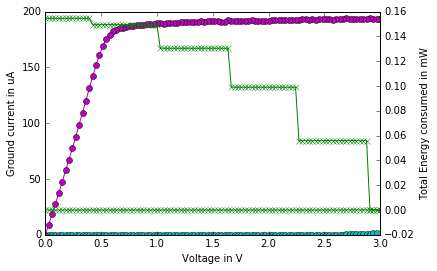

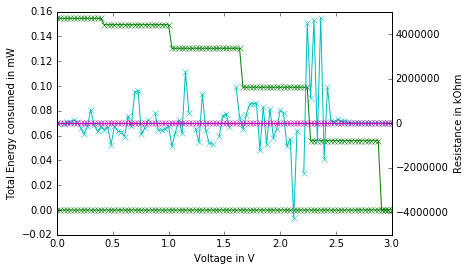

In [2]:
form_sweep= plt.figure(figsize=[10,5])
f=form(3,100,10e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9)
f.to_csv("{}_form_3V.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')))
plt.autoscale()
form_data={}
form_data['FORM_GATE']=1.9
print(checkR(CURRENT_SAMPLE))
form_data['FORM_V']=find_set_V(f)
print("Forming Voltage:",form_data['FORM_V'])

3912.6420082359355
                 EI             ET          EV  cumulative_energy  \
count  2.000000e+02     200.000000  200.000000         200.000000   
mean  -1.761234e-04  332097.103500   -0.750000           0.000086   
std    1.095591e-04       0.277892    0.438458           0.000064   
min   -3.752000e-04  332096.600000   -1.500000          -0.000000   
25%   -2.766500e-04  332096.900000   -1.125000           0.000023   
50%   -1.840000e-04  332097.100000   -0.750000           0.000091   
75%   -7.163750e-05  332097.300000   -0.375000           0.000151   
max   -3.000000e-09  332097.600000    0.000000           0.000161   

                  R  
count    200.000000  
mean    4940.963811  
std     2134.773661  
min       -0.000000  
25%     3253.118569  
50%     4417.567422  
75%     6125.562375  
max    10336.620197  
11817.71570014144


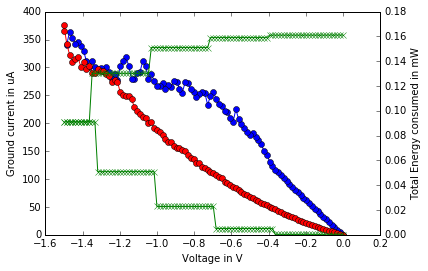

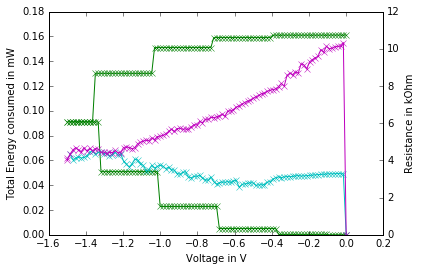

In [5]:
print(checkR(CURRENT_SAMPLE))
r=reset_sweep(-1.5,100,5e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9,plot=True)
r.to_csv("{}_reset_{}.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'), CURRENT_SAMPLE))
print(checkR(CURRENT_SAMPLE))

11894.199346405227
                 EI             ET          EV  cumulative_energy  \
count  2.000000e+02     200.000000  200.000000         200.000000   
mean   1.235078e-04  332102.075500    0.500001           0.000039   
std    7.194625e-05       0.282753    0.292322           0.000031   
min    7.500000e-09  332101.600000    0.000000           0.000000   
25%    4.938750e-05  332101.800000    0.249975           0.000001   
50%    1.690250e-04  332102.100000    0.500050           0.000043   
75%    1.880000e-04  332102.300000    0.750025           0.000071   
max    1.903000e-04  332102.600000    1.000000           0.000080   

                  R  
count    200.000000  
mean    4894.913316  
std     2647.232400  
min        0.000000  
25%     2769.241653  
50%     4102.715521  
75%     5701.830296  
max    10813.704497  
Set Voltage: 0.5556
2974.5158531891893


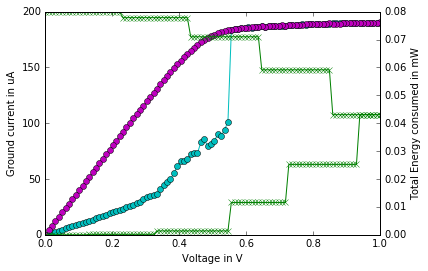

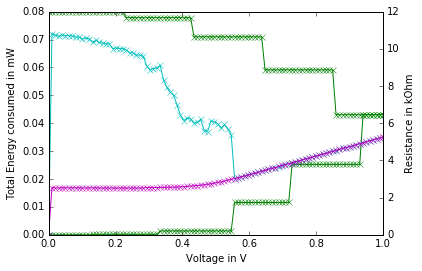

In [6]:
print(checkR(CURRENT_SAMPLE))
s=set_sweep(1.0,100,5e-3, mrange=MeasureRanges_I.uA10_limited,gate=1.9,plot=True)
s.to_csv("{}_set_{}.csv".format(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'), CURRENT_SAMPLE))
print("Set Voltage:", find_set_V(s))
print(checkR(CURRENT_SAMPLE))

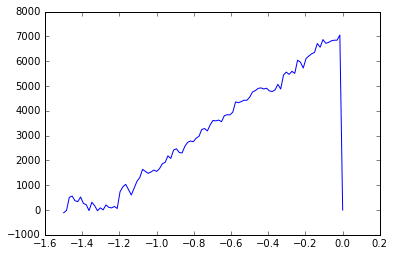

In [7]:
rh=get_hist(r)
plt.plot(rh['EV'],rh['R'])

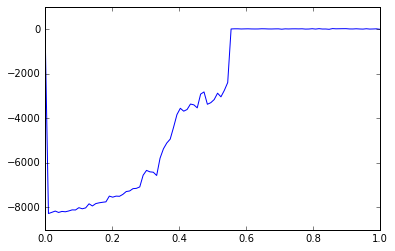

In [8]:
sh=get_hist(s)
plt.plot(sh['EV'],sh['R'])

Reset with Peak -1.5V, 100 steps, gate 1.9V
                 EI             ET          EV  cumulative_energy  \
count  2.000000e+02     200.000000  200.000000         200.000000   
mean  -1.857727e-04  332207.353500   -0.750000           0.000097   
std    1.125651e-04       0.284945    0.438458           0.000070   
min   -3.736500e-04  332206.800000   -1.500000           0.000000   
25%   -2.787375e-04  332207.100000   -1.125000           0.000017   
50%   -2.021500e-04  332207.400000   -0.750000           0.000128   
75%   -7.915375e-05  332207.600000   -0.375000           0.000171   
max    6.000000e-09  332207.800000    0.000000           0.000177   

                  R  
count    200.000000  
mean    4826.190171  
std     2419.541078  
min        0.000000  
25%     2371.160550  
50%     4610.690568  
75%     6031.510461  
max    10493.614084  
Histmax 8217.313072677334
HRS 11756.364922206505
Set with Peak 1.0V, 100 steps, gate 1.9V
                 EI             ET          EV

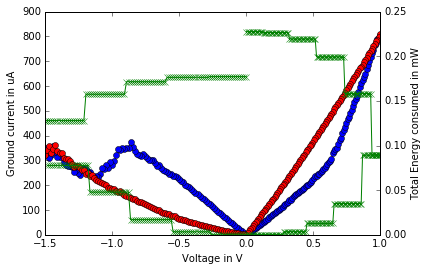

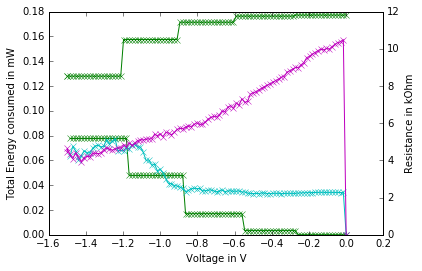

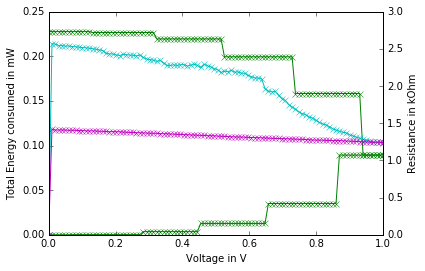

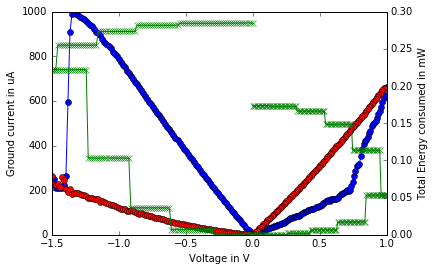

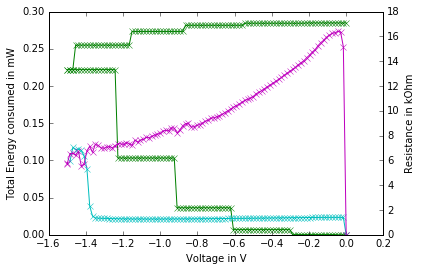

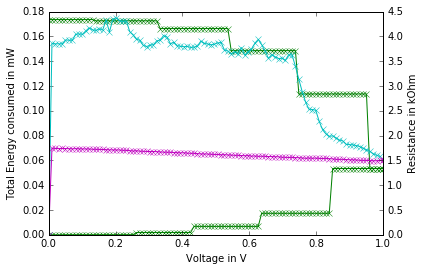

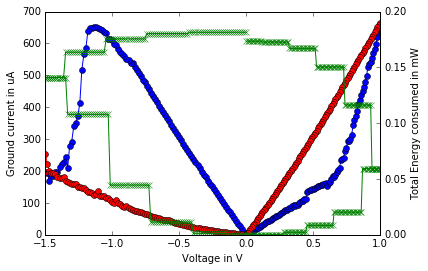

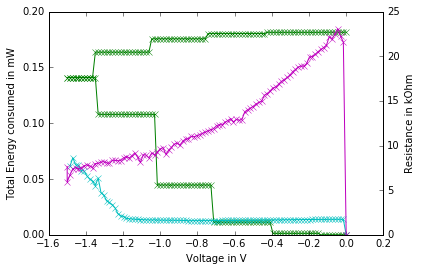

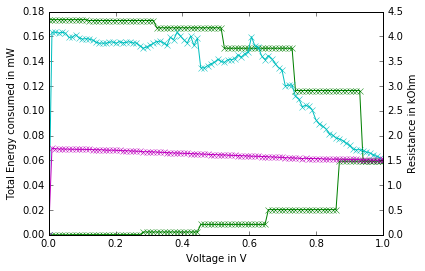

In [10]:
frames,annealing_data=anneal(CURRENT_SAMPLE,setV=1.0,resetV=-1.5,gateV=1.9,steps=100,times=3, plot=True,sleep_between=1)

In [ ]:
pat = get_pyramid_pattern